<span style="font-size:20px; color:blue"> REGRESION LOGISTICA</span>

In [64]:
# Cargar las librerías necesarias

import pandas as pd  # Manejo y análisis de estructuras de datos
import numpy as np  # Cálculo numérico y el análisis de datos
import seaborn as sns  # Creación de gráficos estadísticos
import matplotlib.pyplot as plt  # Creación de gráficos en dos dimensiones

# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Importar la clase para regresión logística
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas para evaluación del modelo
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay


In [5]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv(r'C:\Users\carli\OneDrive\Escritorio\heart_cleveland.csv')

In [7]:
from IPython.display import display

# Mostrar el DataFrame completo
display(Datos)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [9]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


<span style="font-size:20px; color:blue">1) ANALISIS EXPLORATORIO </span>

Valores nulos por columna:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


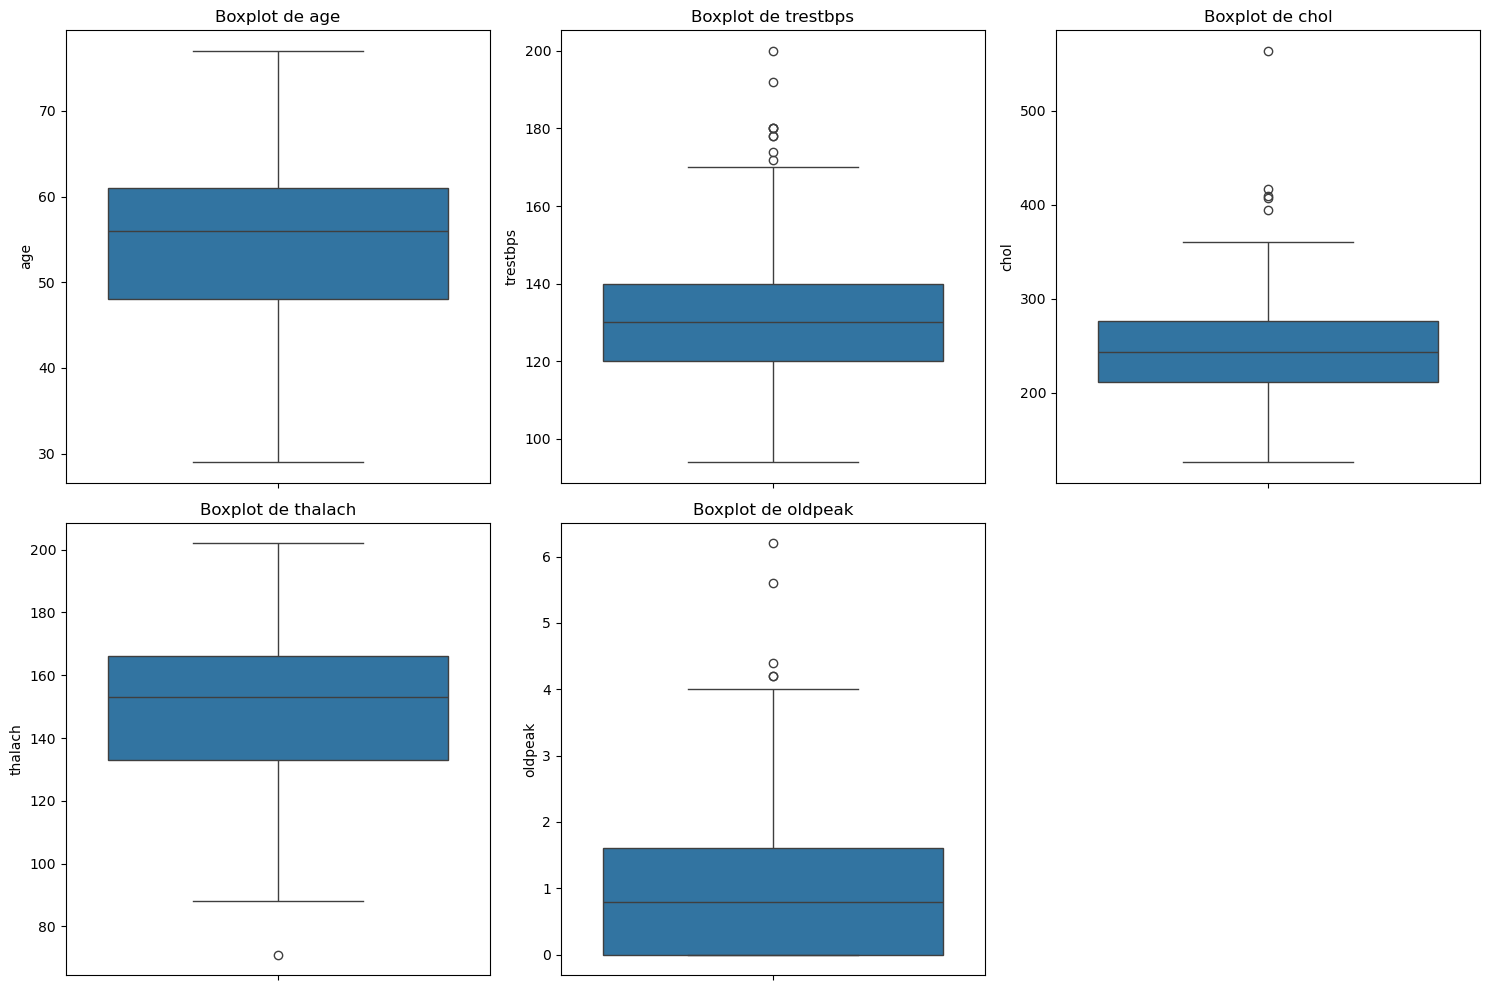

In [11]:
# Paso 1: Identificación de valores nulos
# Imprimimos la cantidad de valores nulos por columna en el dataset para identificar si hay datos faltantes.
print("Valores nulos por columna:")
print(Datos.isnull().sum())

# Paso 2: Detección visual de valores atípicos
# Creamos una figura de tamaño 15x10 para visualizar boxplots de varias columnas numéricas.
plt.figure(figsize=(15, 10))

# Iteramos a través de las columnas seleccionadas para generar un boxplot para cada una.
# Cada gráfico muestra los valores atípicos (outliers) como puntos fuera del rango principal de los datos.
for i, column in enumerate(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], 1):
    plt.subplot(2, 3, i)  # Define la posición del gráfico en una cuadrícula de 2 filas y 3 columnas
    sns.boxplot(y=Datos[column])  # Crea el boxplot para la columna actual
    plt.title(f'Boxplot de {column}')  # Título del gráfico, indicando la columna visualizada
    
plt.tight_layout()  # Ajusta el espaciado entre gráficos para que no se sobrepongan
plt.show()  # Muestra todos los gráficos juntos

<span style="font-size:20px; color:blue">2) LIMPIEZA DE LOS DATOS </span>

In [13]:
# Revisión de datos faltantes (valores cero) en las columnas del dataset de enfermedad cardíaca

print("Cantidad de registros con cero en 'age':", Datos['age'].isin([0]).sum())
print("Cantidad de registros con cero en 'trestbps':", Datos['trestbps'].isin([0]).sum())
print("Cantidad de registros con cero en 'chol':", Datos['chol'].isin([0]).sum())
print("Cantidad de registros con cero en 'thalach':", Datos['thalach'].isin([0]).sum())
print("Cantidad de registros con cero en 'oldpeak':", Datos['oldpeak'].isin([0]).sum())


Cantidad de registros con cero en 'age': 0
Cantidad de registros con cero en 'trestbps': 0
Cantidad de registros con cero en 'chol': 0
Cantidad de registros con cero en 'thalach': 0
Cantidad de registros con cero en 'oldpeak': 96


In [15]:
# Reemplazar valores cero con el promedio de la columna en las columnas seleccionadas

Datos['age'] = Datos['age'].replace(0, Datos['age'].mean())           # Edad
Datos['trestbps'] = Datos['trestbps'].replace(0, Datos['trestbps'].mean())   # Presión arterial en reposo
Datos['chol'] = Datos['chol'].replace(0, Datos['chol'].mean())         # Colesterol
Datos['thalach'] = Datos['thalach'].replace(0, Datos['thalach'].mean())       # Frecuencia cardíaca máxima
Datos['oldpeak'] = Datos['oldpeak'].replace(0, Datos['oldpeak'].mean())       # Depresión ST

# Verificar los primeros registros del dataset después del reemplazo
print(Datos.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [17]:
# Definir los niveles mínimo y máximo para identificar datos atípicos en cada columna relevante
# Estos niveles son solo ejemplos; deberías ajustarlos según el conocimiento de tus datos

# Ejemplo de rangos atípicos (ajusta estos valores según el contexto de cada columna) 
age_min = 30
age_max = 74
chol_min = 100
chol_max = 400
trestbps_min = 80
trestbps_max = 200
thalach_min = 60
thalach_max = 220

# Contar datos atípicos en cada columna
total_atipicos_age = ((Datos['age'] < age_min) | (Datos['age'] > age_max)).sum()
total_atipicos_chol = ((Datos['chol'] < chol_min) | (Datos['chol'] > chol_max)).sum()
total_atipicos_trestbps = ((Datos['trestbps'] < trestbps_min) | (Datos['trestbps'] > trestbps_max)).sum()
total_atipicos_thalach = ((Datos['thalach'] < thalach_min) | (Datos['thalach'] > thalach_max)).sum()
total_atipicos_oldpeak = (Datos['oldpeak'] < 0).sum()  # oldpeak podría ser atípico si es negativo

# Imprimir la cantidad de datos atípicos en cada columna
print("El total de datos atípicos en 'age' es:", total_atipicos_age)
print("El total de datos atípicos en 'chol' es:", total_atipicos_chol)
print("El total de datos atípicos en 'trestbps' es:", total_atipicos_trestbps)
print("El total de datos atípicos en 'thalach' es:", total_atipicos_thalach)
print("El total de datos atípicos en 'oldpeak' es:", total_atipicos_oldpeak)

El total de datos atípicos en 'age' es: 3
El total de datos atípicos en 'chol' es: 4
El total de datos atípicos en 'trestbps' es: 0
El total de datos atípicos en 'thalach' es: 0
El total de datos atípicos en 'oldpeak' es: 0


In [19]:
# Definir los límites para considerar valores atípicos en 'age' y 'chol'
age_min, age_max = 29, 77      # Estos valores se basan en la descripción estadística que mostraste
chol_min, chol_max = 126, 564  # Límite de valores en la columna 'chol'

# Reemplazar valores atípicos en 'age' con la mediana de la columna
Datos.loc[(Datos['age'] < age_min) | (Datos['age'] > age_max), 'age'] = Datos['age'].median()

# Reemplazar valores atípicos en 'chol' con la mediana de la columna
Datos.loc[(Datos['chol'] < chol_min) | (Datos['chol'] > chol_max), 'chol'] = Datos['chol'].median()

# Verificar los cambios
print("Valores atípicos de 'age' y 'chol' han sido reemplazados con la mediana.")

Valores atípicos de 'age' y 'chol' han sido reemplazados con la mediana.


In [21]:
# Validación para 'age'
Total_Atipicos_age = ((Datos['age'] < age_min) | (Datos['age'] > age_max)).sum()
print("El total de datos atípicos restantes en 'age' es: {}".format(Total_Atipicos_age))

# Validación para 'chol'
Total_Atipicos_chol = ((Datos['chol'] < chol_min) | (Datos['chol'] > chol_max)).sum()
print("El total de datos atípicos restantes en 'chol' es: {}".format(Total_Atipicos_chol))

El total de datos atípicos restantes en 'age' es: 0
El total de datos atípicos restantes en 'chol' es: 0


In [23]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


<span style="font-size:20px; color:blue">3) SELECCION DE LAS CARACTERISTICAS </span>

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar solo las columnas de interés
columnas_interes = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = Datos[columnas_interes]  # Seleccionar solo las columnas especificadas
y = Datos['condition']        # Variable objetivo (presencia o ausencia de enfermedad cardíaca)

# Aplicar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k=5)  # Seleccionar las 5 características principales
X_selected = selector.fit_transform(X, y)           # Ajustar y transformar

# Obtener los nombres de las columnas seleccionadas
selected_features = X.columns[selector.get_support()]  # Filtrar las columnas seleccionadas
print("Características seleccionadas:", selected_features)  # Imprimir las características seleccionadas


Características seleccionadas: Index(['cp', 'thalach', 'exang', 'ca', 'thal'], dtype='object')


<span style="font-size:20px; color:blue">4) DIVISION DEL DATASET EN TRAIN Y TEST</span>

<span style="font-size:20px; color:blue">5) ENTRENAMIENTO DEL MODELO</span>

<span style="font-size:20px; color:blue">6) EVALUACION DE DESEMPEÑO</span>


In [60]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (75% entrenamiento, 25% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, stratify=y, random_state=0)

# Imprimir los conjuntos de entrenamiento
print("Conjunto de entrenamiento X:", X_train)
print("Conjunto de entrenamiento y:", y_train)

# Crear y entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir las predicciones
print("Predicciones del modelo:", y_pred)

# Evaluar el modelo
print("Matriz de confusión:")
cm = confusion_matrix(y_test, y_pred)            # Calcular la matriz de confusión
print(cm)                                         # Imprimir la matriz de confusión
print(classification_report(y_test, y_pred))     # Imprimir el informe de clasificación

                                        

Conjunto de entrenamiento X: [[  3. 133.   1.   2.   2.]
 [  2. 152.   0.   1.   0.]
 [  1. 169.   0.   0.   0.]
 ...
 [  3. 114.   0.   3.   2.]
 [  2. 160.   1.   0.   0.]
 [  3. 140.   0.   0.   2.]]
Conjunto de entrenamiento y: 234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64
Predicciones del modelo: [1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0
 1]
Matriz de confusión:
[[36  4]
 [ 5 30]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



<span style="font-size:20px; color:blue">7) GRAFICAS</span>

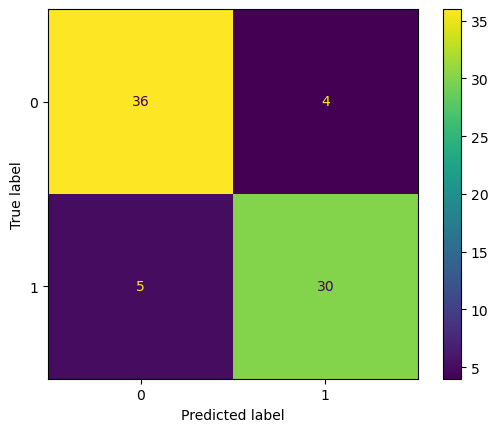

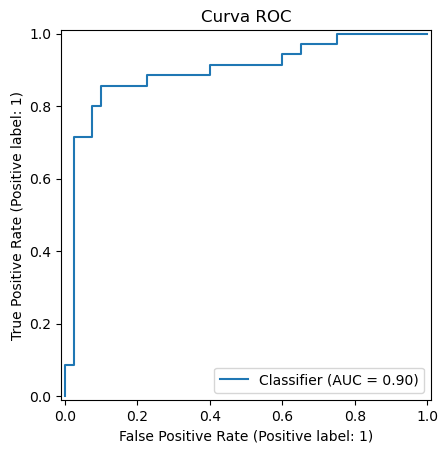

In [66]:
# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Crear un objeto para visualizar
disp.plot()                                         # Mostrar la matriz de confusión

# Curva ROC del modelo
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Obtener las probabilidades de la clase positiva
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Curva ROC")
plt.show()  

<span style="font-size:20px; color:blue">INTERPRETACIÓN ANEXO EN EL DUCUMENTO PDF</span>
